In [1]:
# Data Analytics Library
import pandas as pd
import numpy as np

# Data Preprocessing, Machine Learning and Metrics Libraries 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Data Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv("promotion_train.csv")


In [3]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
print(f'The dateset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dateset has 54808 rows and 14 columns.


In [6]:
print('Columns of dataset\n__________________________________________________________________________________________________')
print('HR Promotion Dataset:', df.columns)

Columns of dataset
__________________________________________________________________________________________________
HR Promotion Dataset: Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')


In [7]:
# Print unique values in each column of the  dataset
for col in df.columns:
    print("Unique values in column '{}' are:".format(col))
    print(df[col].unique())

Unique values in column 'employee_id' are:
[65438 65141  7513 ... 13918 13614 51526]
Unique values in column 'department' are:
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
Unique values in column 'region' are:
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
Unique values in column 'education' are:
["Master's & above" "Bachelor's" nan 'Below Secondary']
Unique values in column 'gender' are:
['f' 'm']
Unique values in column 'recruitment_channel' are:
['sourcing' 'other' 'referred']
Unique values in column 'no_of_trainings' are:
[ 1  2  3  4  7  5  6  8 10  9]
Unique values in c

In [8]:
# Check for any missing values or inconsistencies in the dataset
print("Check for missing values\n________________________________________")
print(df.isnull().sum())
print('________________________________________\nNumber of records in total: {}\nNumber of records that has NaN values: {}'.format(df.shape[0], df.isnull().sum(axis=1).astype(bool).sum()))

Check for missing values
________________________________________
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64
________________________________________
Number of records in total: 54808
Number of records that has NaN values: 6148


The columns "education" and "previous_year_rating" contains null value

# Data Cleaning

Fill the "previous_year_rating" column with 0 indicates that the employee is working for the first year and does not have any previous year rating.

In [9]:
df['previous_year_rating'].fillna(0, inplace=True)

Fill the "education" column by clustering. Apply PCA for dimensional reduction for all numerical features then apply k-means clustering.

In [10]:
# Create a DataFrame with missing values in the 'education' column
df_missing_education = df[df['education'].isnull()].copy()

# Drop missing values in the 'education' column from the main DataFrame
df_cleaned = df.dropna(subset=['education']).copy()

# Select relevant features for clustering (excluding 'education' column)
features = ['no_of_trainings', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?',
            'avg_training_score', 'is_promoted']
X = df_cleaned[features]

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X_pca)

# Impute missing values in 'education' based on cluster mode
cluster_modes = df_cleaned.groupby('cluster')['education'].agg(lambda x: x.mode().iloc[0])

# Fill missing 'education' values based on cluster mode in the subset DataFrame
df_missing_education['education'] = df_missing_education.apply(
    lambda row: cluster_modes.get(kmeans.predict(pca.transform(row[features].values.reshape(1, -1)))[0], None), axis=1)

# Combine the subset DataFrame with imputed values back into the original DataFrame
df_combined = pd.concat([df_cleaned, df_missing_education], ignore_index=False)

# Ensure the combined DataFrame has the same indices as the original DataFrame
df_combined.sort_index(inplace=True)

# Update the original DataFrame with the imputed values
df['education'] = df_combined['education']

# Optionally, if there are still issues, you can reset the index on both DataFrames for direct assignment
df_combined.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df['education'] = df_combined['education']

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names

In [11]:
# Check for any missing values or inconsistencies in the dataset
print("Check for missing valuest\n________________________________________")
print(df.isnull().sum())
print('________________________________________\nNumber of records in total: {}\nNumber of records that has NaN values: {}'.format(df.shape[0], df.isnull().sum(axis=1).astype(bool).sum()))

Check for missing valuest
________________________________________
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64
________________________________________
Number of records in total: 54808
Number of records that has NaN values: 0


In [12]:
print('There are {} duplicate values.'.format(df.duplicated().sum()))

There are 0 duplicate values.


In [13]:
df.to_csv('cleaned_promotion_train.csv.csv', index=False)

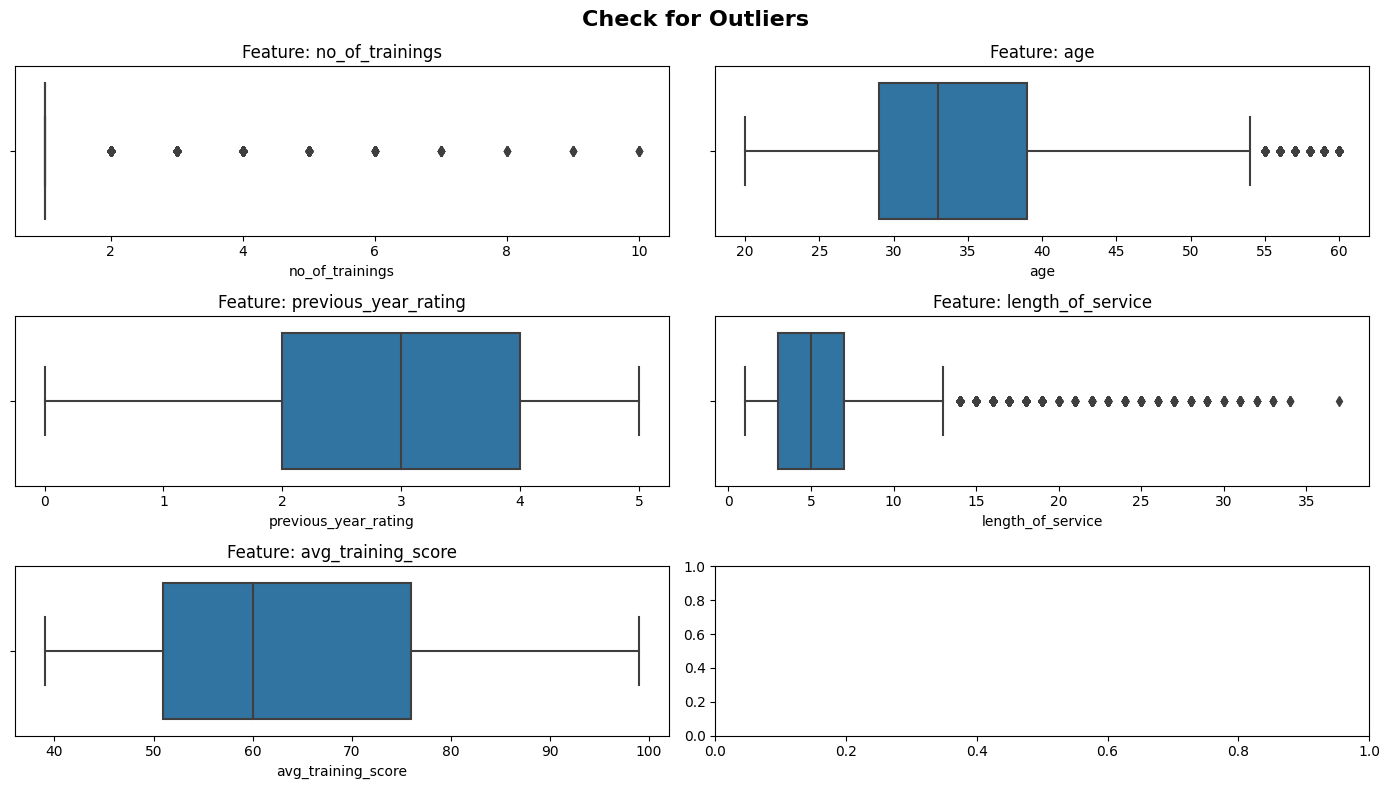

In [14]:
# Check outliers for numerical values
numerical_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service','avg_training_score']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
plt.suptitle('Check for Outliers', fontsize=16, fontweight='bold')

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f"Feature: {feature}")

plt.tight_layout()
plt.show()

In [15]:
# Use Z-score to remove some of the outliers.
def remove_outliers_zscore(df, features, threshold=3):
    cleaned_df = df.copy()
    for feature in features:
        mean = df[feature].mean()
        std = df[feature].std()
        z_scores = (df[feature] - mean) / std
        cleaned_df = cleaned_df[np.abs(z_scores) <= threshold]
    return cleaned_df

df = remove_outliers_zscore(df, numerical_features)

C:\Users\Asus\AppData\Local\Temp\ipykernel_37096\2827676003.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df = cleaned_df[np.abs(z_scores) <= threshold]
C:\Users\Asus\AppData\Local\Temp\ipykernel_37096\2827676003.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df = cleaned_df[np.abs(z_scores) <= threshold]
C:\Users\Asus\AppData\Local\Temp\ipykernel_37096\2827676003.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df = cleaned_df[np.abs(z_scores) <= threshold]
C:\Users\Asus\AppData\Local\Temp\ipykernel_37096\2827676003.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df = cleaned_df[np.abs(z_scores) <= threshold]


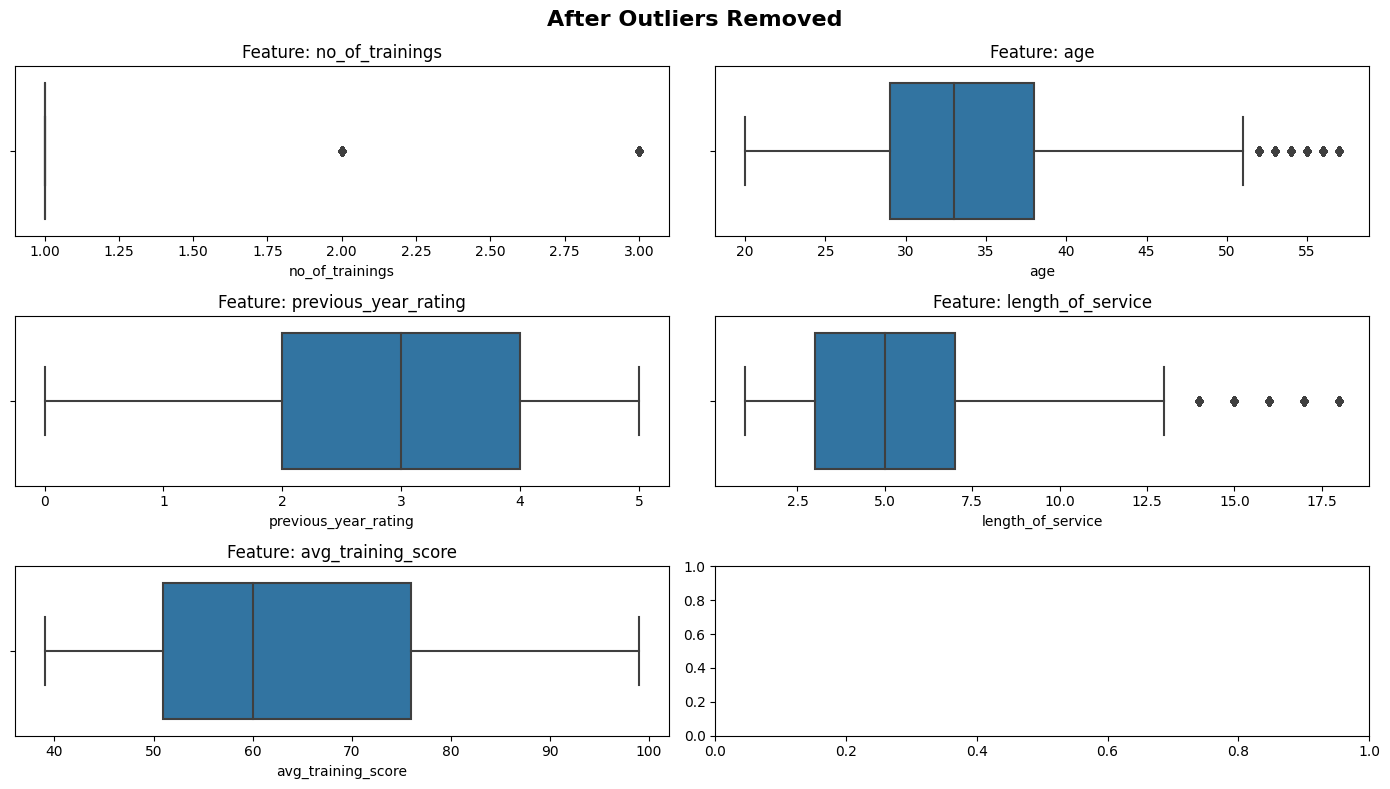

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
plt.suptitle('After Outliers Removed', fontsize=16, fontweight='bold')

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f"Feature: {feature}")

plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA)

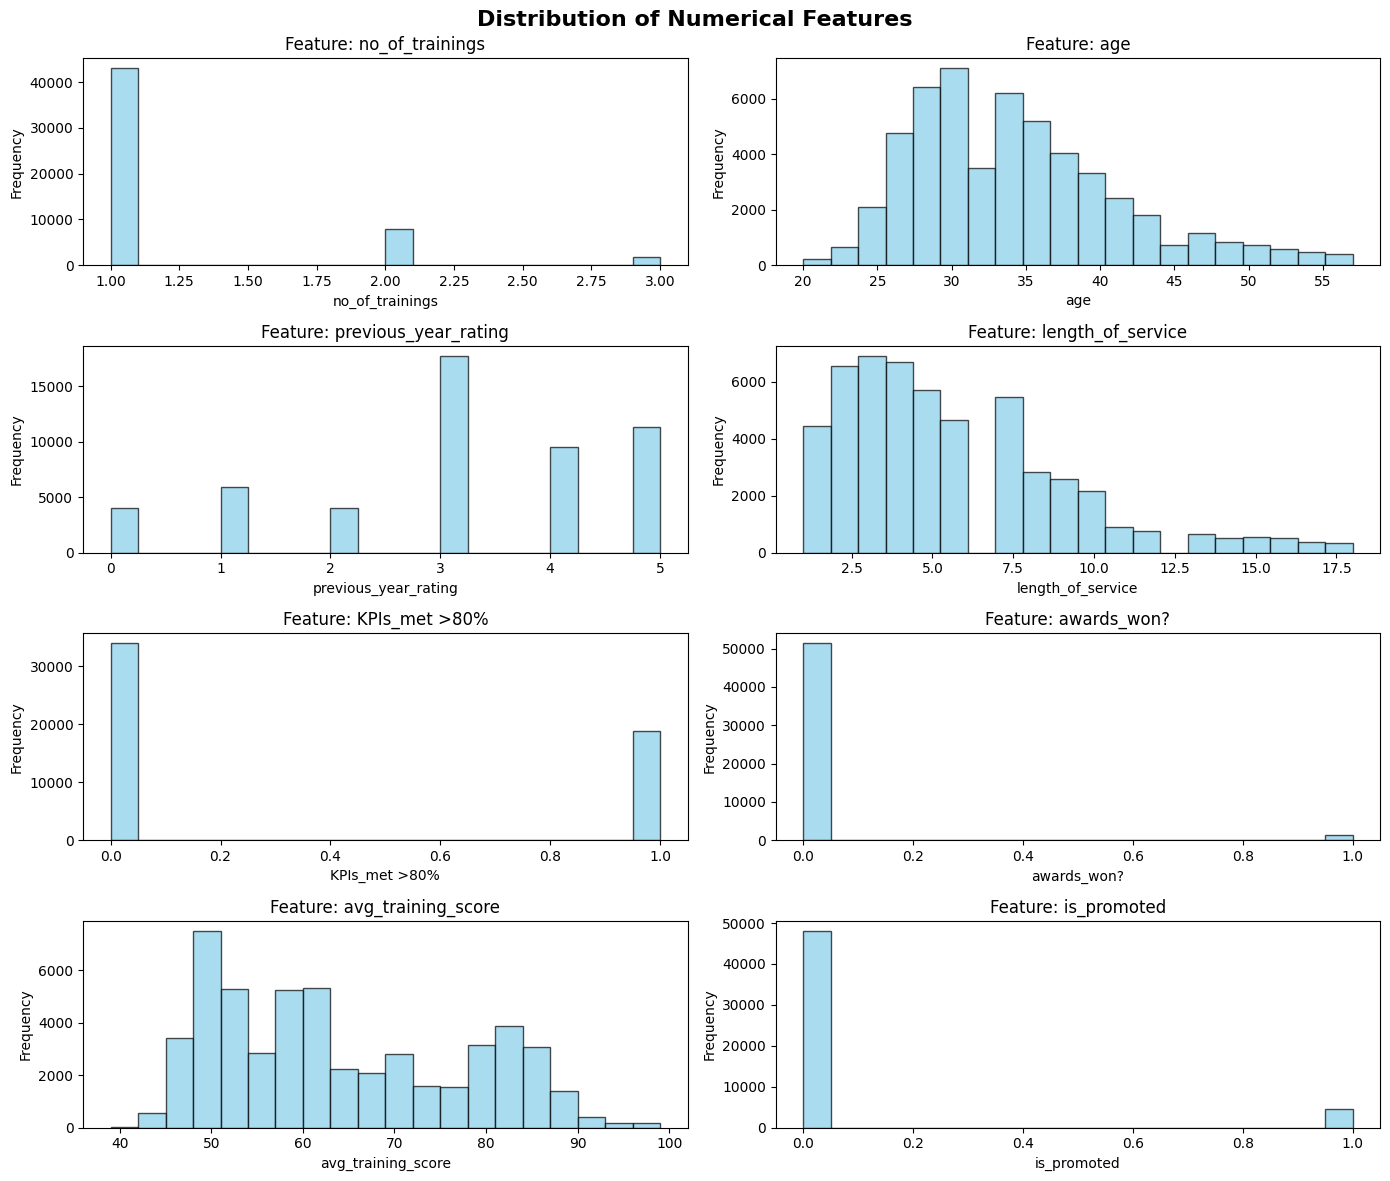

In [17]:
# Select numerical columns for correlation matrix
numerical_columns = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 
                     'KPIs_met >80%', 'awards_won?', 'avg_training_score','is_promoted']


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

for i, feature in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    axes[row, col].hist(df[feature], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f"Feature: {feature}", fontsize=12)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Hide empty subplots
for i in range(len(numerical_columns), len(axes.flatten())):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


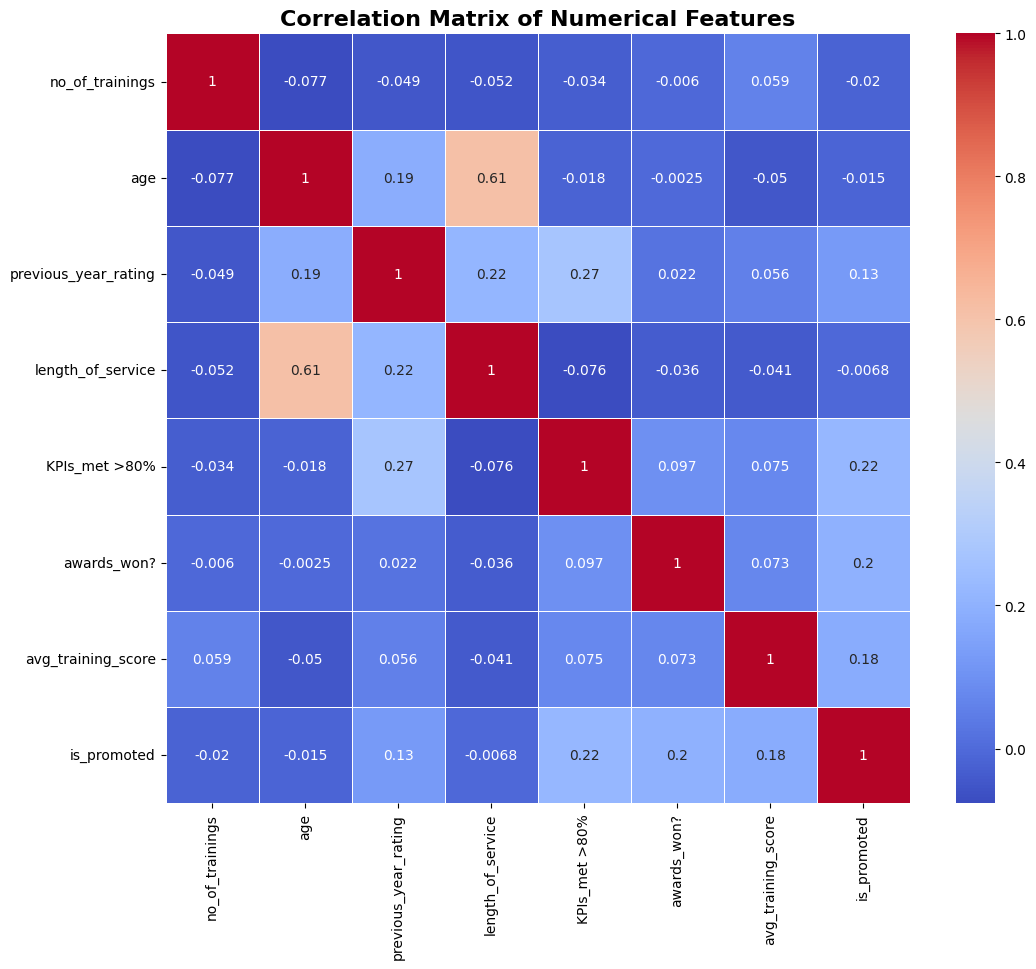

In [18]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(),cmap='coolwarm',linewidth=0.5,annot=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.show()

In [19]:
# Print correlation coefficients of 'is_promoted' with other numerical features
print("Correlation of 'is_promoted' with other numerical features:")
print(df[numerical_columns].corr()['is_promoted'])


Correlation of 'is_promoted' with other numerical features:
no_of_trainings        -0.020479
age                    -0.014903
previous_year_rating    0.125307
length_of_service      -0.006828
KPIs_met >80%           0.219029
awards_won?             0.197142
avg_training_score      0.180070
is_promoted             1.000000
Name: is_promoted, dtype: float64


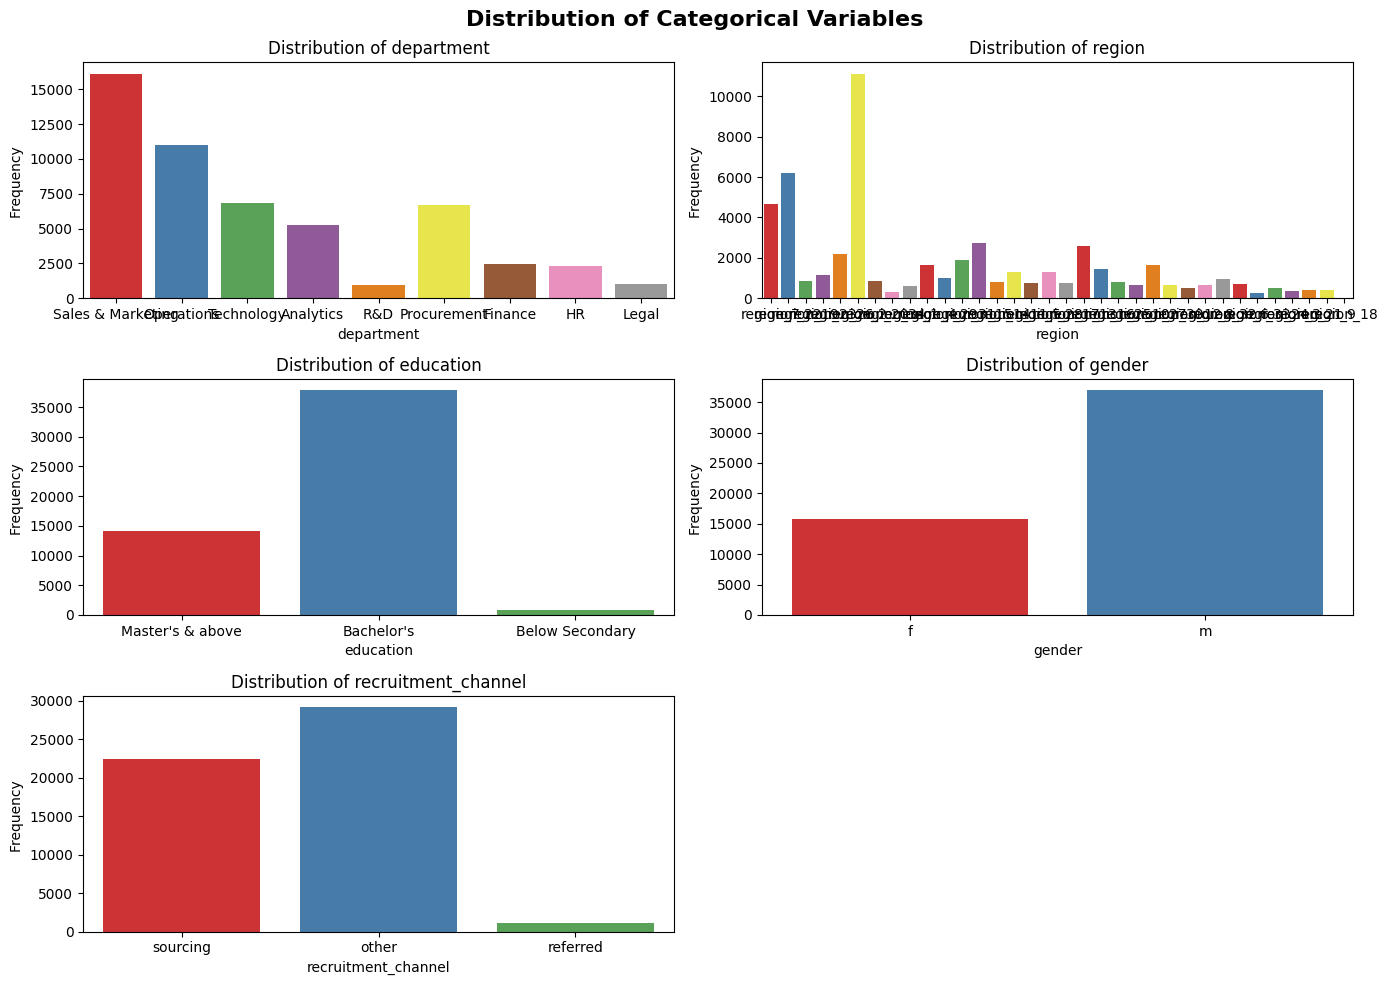

In [20]:
categorical_columns = ['department','region','education','gender','recruitment_channel']

# Plot count plots for each categorical variable
plt.figure(figsize=(14, 10))
plt.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold')

for i, column in enumerate(categorical_columns, start=1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=column, palette='Set1')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency ')

plt.tight_layout()
plt.show()

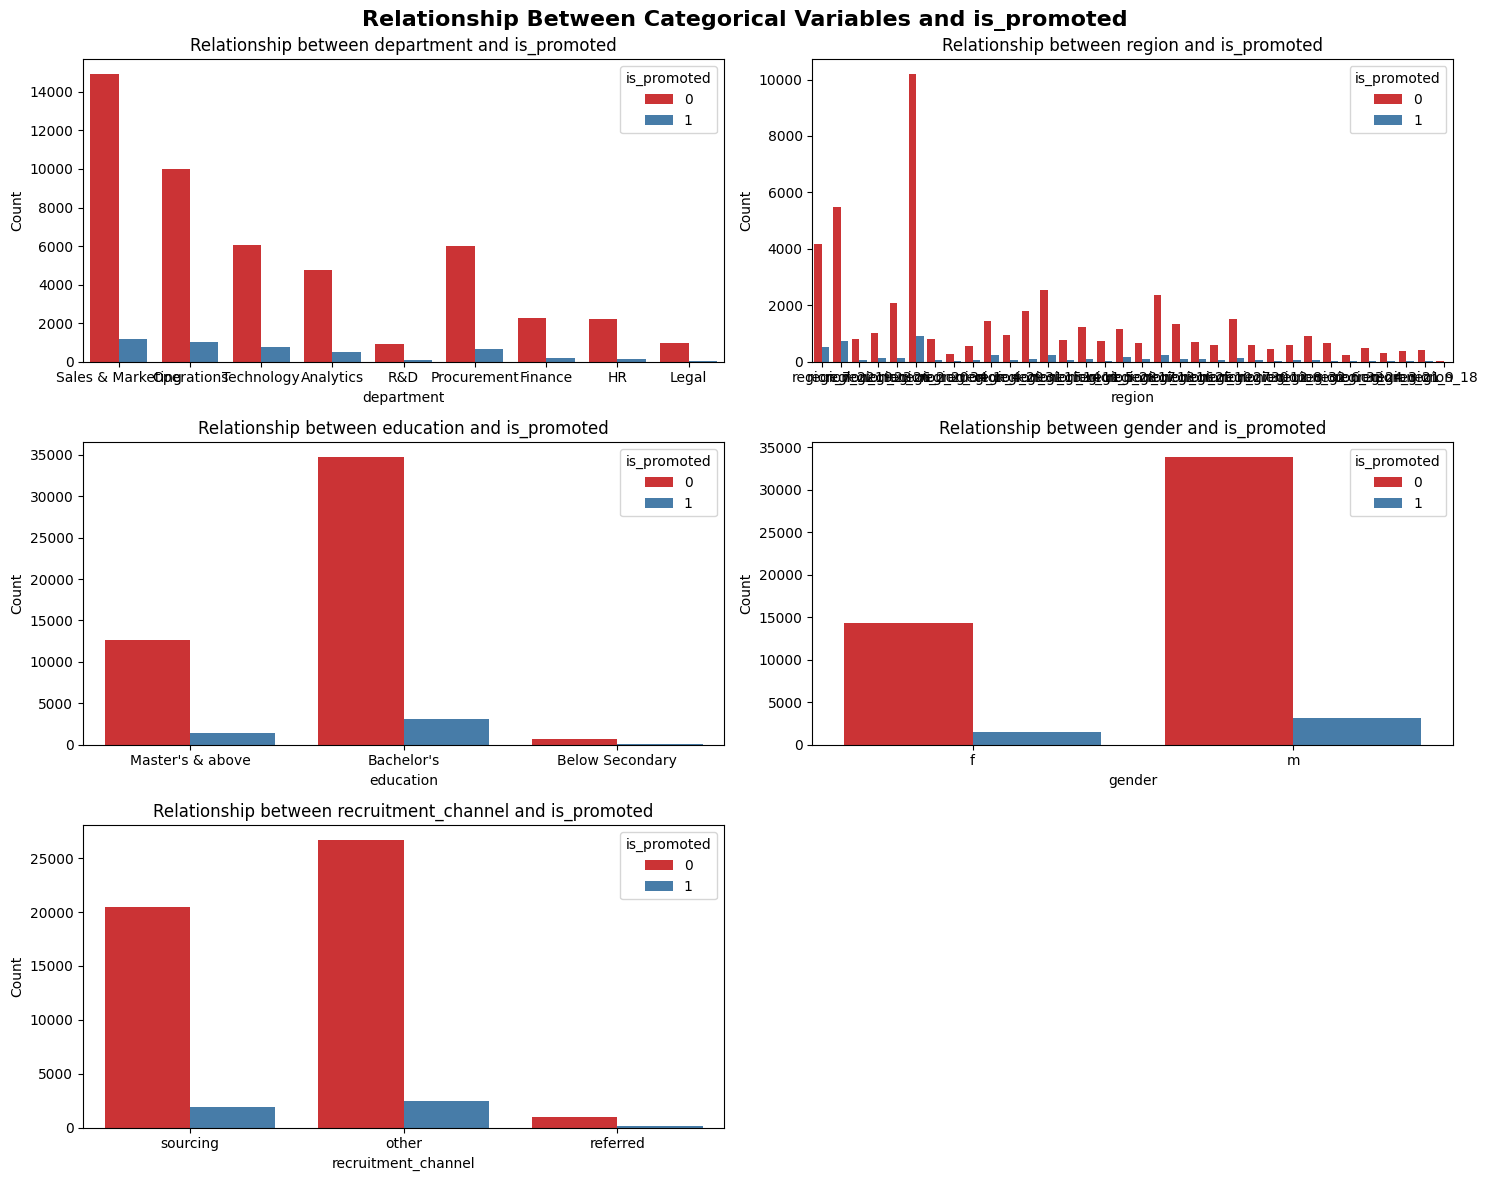

In [21]:
# Plot stacked bar charts for each categorical variable with respect to the target variable
plt.figure(figsize=(15, 12))
plt.suptitle('Relationship Between Categorical Variables and is_promoted', fontsize=16, fontweight='bold')

for i, column in enumerate(categorical_columns, start=1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=column, hue='is_promoted', palette='Set1', dodge=True)
    plt.title(f'Relationship between {column} and is_promoted')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

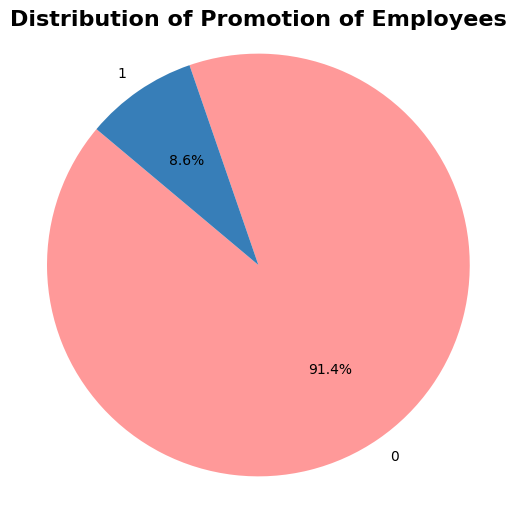

In [22]:
# Count the number of promoted and non-promoted employees
promoted_counts = df['is_promoted'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(promoted_counts, labels=promoted_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#377eb8'])
plt.title('Distribution of Promotion of Employees', fontsize=16, fontweight='bold')
plt.axis('equal')  
plt.show()

In [23]:
# Print the frequency
print(df['is_promoted'].value_counts())

is_promoted
0    48141
1     4532
Name: count, dtype: int64


# Data Preprocessing

In [24]:
# Initialize LabelEncoder
le = LabelEncoder()

# Define the desired mapping of categories to encoded values
category_mapping = {
    'Below Secondary': 0,
    "Bachelor's": 1,
    "Master's & above": 2
}

# Fit the LabelEncoder with the desired mapping
le.fit(df['education'])

# Manually transform the categories using the desired mapping
df['education'] = df['education'].map(category_mapping)


In [25]:
# Perform One-Hot Encoding for the "recruitment_channe" columns
df = pd.get_dummies(df, columns=['recruitment_channel'], prefix='recruitment')
encoded_columns = [col for col in df.columns if col.startswith('recruitment_')]
df[encoded_columns] = df[encoded_columns].astype(int)

In [26]:
columns_to_drop = ['employee_id','department','region','gender','age']
df.drop(columns=columns_to_drop, inplace=True)

In [27]:
# Extract the 'is_promoted' column
is_promoted = df.pop('is_promoted')

# Add the 'is_promoted' column back to the DataFrame at the last index
df['is_promoted'] = is_promoted

In [28]:
df.head()

,education,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,recruitment_other,recruitment_referred,recruitment_sourcing,is_promoted
0,2,1,5.0,8,1,0,49,0,0,1,0
1,1,1,5.0,4,0,0,60,1,0,0,0
2,1,1,3.0,7,0,0,50,0,0,1,0
3,1,2,1.0,10,0,0,50,1,0,0,0
4,1,1,3.0,2,0,0,73,1,0,0,0


## Create 2 dataframes to compare the results of handling class imbalance problem in classification task
- a) oversampled_df - Up-sampled the class with lower samples which is '1' in this case to match the samples of '0'
- b) undersampled_df - Down-sampled the class with higher samples which is '0' in this case to match the samples of '1'

In [29]:
# Up-sampled the '1' class
y_train =df['is_promoted']
oversampled_df, oversampled_trainY = SMOTE().fit_resample(df, y_train)

In [30]:
print("After OverSampling")
oversampled_df['is_promoted'].value_counts()

After OverSampling


is_promoted
0    48141
1    48141
Name: count, dtype: int64

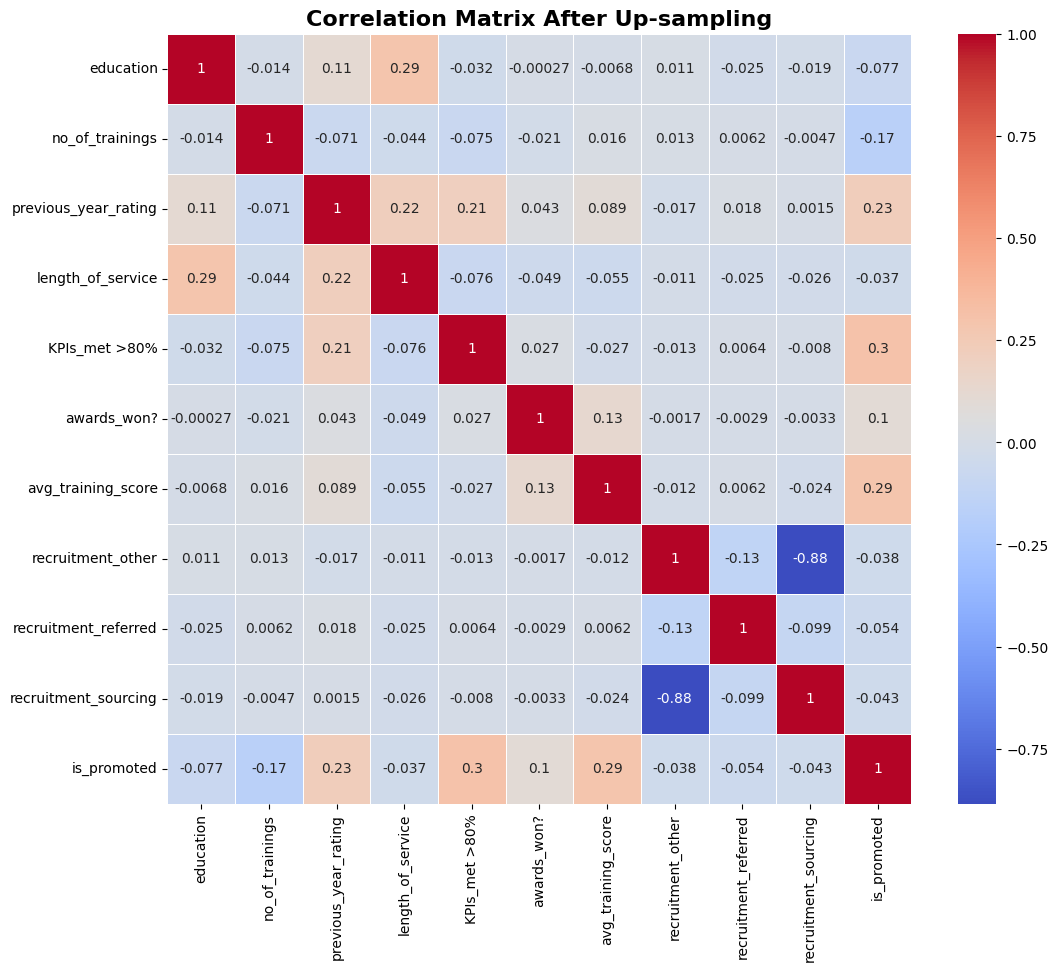

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(oversampled_df.corr(),cmap='coolwarm',linewidth=0.5,annot=True)
plt.title('Correlation Matrix After Up-sampling',fontsize=16, fontweight='bold')
plt.show()

In [32]:
print("Correlation of 'is_promoted' with other numerical features:")
print(oversampled_df.corr()['is_promoted'])

Correlation of 'is_promoted' with other numerical features:
education              -0.076601
no_of_trainings        -0.165473
previous_year_rating    0.226677
length_of_service      -0.037391
KPIs_met >80%           0.303102
awards_won?             0.100290
avg_training_score      0.293147
recruitment_other      -0.038133
recruitment_referred   -0.054177
recruitment_sourcing   -0.042721
is_promoted             1.000000
Name: is_promoted, dtype: float64


In [33]:
# Down-sampled the '0' class
randomn_df = df.sample(frac=1,random_state=4)

is_promoted = randomn_df.loc[randomn_df['is_promoted'] == 1]

non_promoted = randomn_df.loc[randomn_df['is_promoted'] == 0].sample(n=4532,random_state=42)

undersampled_df = pd.concat([is_promoted, non_promoted])

In [34]:
print("After Down-Sampling")
undersampled_df['is_promoted'].value_counts()

After Down-Sampling


is_promoted
1    4532
0    4532
Name: count, dtype: int64

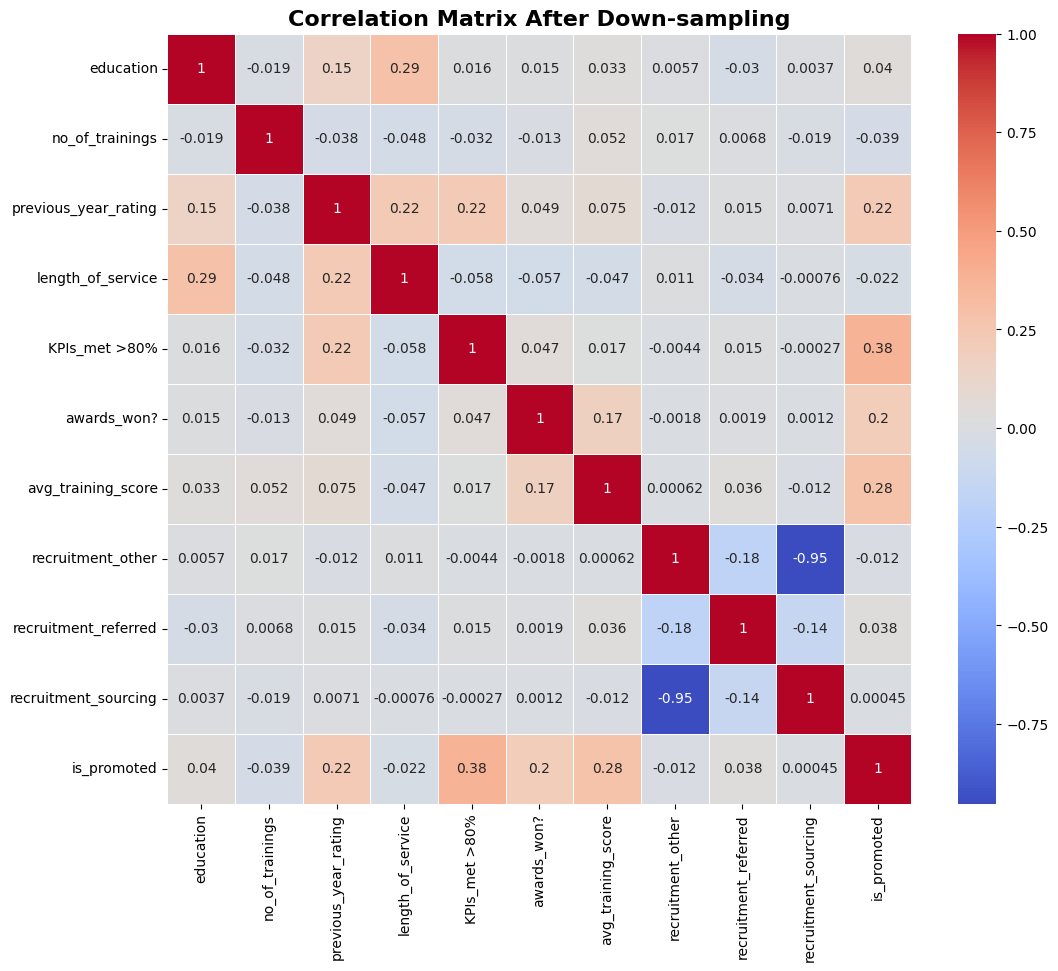

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(undersampled_df.corr(),cmap='coolwarm',linewidth=0.5,annot=True)
plt.title('Correlation Matrix After Down-sampling',fontsize=16, fontweight='bold')
plt.show()

In [36]:
print("Correlation of 'is_promoted' with other numerical features:")
print(undersampled_df.corr()['is_promoted'])

Correlation of 'is_promoted' with other numerical features:
education               0.039785
no_of_trainings        -0.039183
previous_year_rating    0.222690
length_of_service      -0.022381
KPIs_met >80%           0.376058
awards_won?             0.204481
avg_training_score      0.279519
recruitment_other      -0.012201
recruitment_referred    0.037912
recruitment_sourcing    0.000447
is_promoted             1.000000
Name: is_promoted, dtype: float64


# Data Modelling & Evaluation

## Perform classification task on the oversampled data with 5 different classification model to compare the results:
- a) Logistic Regression
- b) Decision Tree
- c) Random Forest
- d) K-nearest Neighbors
- e) Gradient Boosting

In [37]:
# Initialize the StandardScaler to scale the data into interval of [0,1]
scaler = MinMaxScaler()

# Fit and transform the data
oversampled_df_scaled = scaler.fit_transform(oversampled_df)

# Convert the scaled array back to a DataFrame
oversampled_df_scaled = pd.DataFrame(oversampled_df_scaled, columns=oversampled_df.columns)


In [38]:
oversampled_df_scaled.head(10)

,education,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,recruitment_other,recruitment_referred,recruitment_sourcing,is_promoted
0,1.0,0.0,1.0,0.411765,1.0,0.0,0.166667,0.0,0.0,1.0,0.0
1,0.5,0.0,1.0,0.176471,0.0,0.0,0.350000,1.0,0.0,0.0,0.0
2,0.5,0.0,0.6,0.352941,0.0,0.0,0.183333,0.0,0.0,1.0,0.0
3,0.5,0.5,0.2,0.529412,0.0,0.0,0.183333,1.0,0.0,0.0,0.0
4,0.5,0.0,0.6,0.058824,0.0,0.0,0.566667,1.0,0.0,0.0,0.0
5,0.5,0.5,0.6,0.352941,0.0,0.0,0.766667,0.0,0.0,1.0,0.0
6,0.5,0.0,0.6,0.235294,0.0,0.0,0.333333,1.0,0.0,0.0,0.0
7,1.0,0.0,0.6,0.294118,0.0,0.0,0.400000,0.0,0.0,1.0,0.0
8,0.5,0.0,0.8,0.235294,0.0,0.0,0.733333,1.0,0.0,0.0,0.0
9,1.0,0.0,1.0,0.235294,1.0,0.0,0.250000,0.0,0.0,1.0,0.0


In [39]:
# Split the oversampled dataset into training and testing sets for model evaluation
X_os = oversampled_df_scaled.drop('is_promoted', axis=1) 
y_os = oversampled_df_scaled['is_promoted'] 
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=0.2, random_state=42)


In [40]:
# Method to perform evaluation on the model by printing classification report and plotting confusion matrix
def evaluate_classifier(X_test, y_test, classifier, classifier_name):
    # Make predictions on the test data
    y_pred_test = classifier.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred_test)
    classification_rep = classification_report(y_test, y_pred_test)

    # Print the results
    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {accuracy:.5f}")
    print("\nClassification Report:")
    print(classification_rep)
    
    # Compute confusion matrix
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Visualize confusion matrix
    plt.figure()
    sns.heatmap(cm_test, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix - {classifier_name} (Test Data)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [41]:
from sklearn.metrics import roc_curve, auc

# Method to plot roc_auc curve
def plot_roc_curve(classifier, X_test, y_test, classifier_name):
    # Get predicted probabilities on the test data
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area for the test data
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the test data
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {classifier_name} (Test Data)')
    plt.legend(loc='lower right')
    plt.show()


Classifier: Logistic Regression
Accuracy: 0.71288

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71      9593
         1.0       0.71      0.71      0.71      9664

    accuracy                           0.71     19257
   macro avg       0.71      0.71      0.71     19257
weighted avg       0.71      0.71      0.71     19257



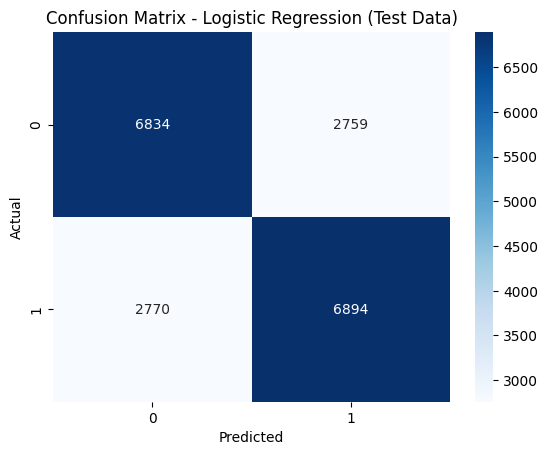

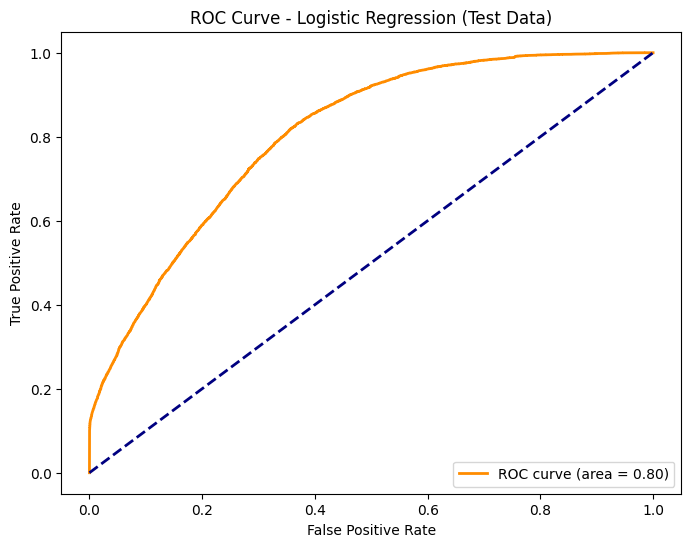

In [42]:
from sklearn.linear_model import LogisticRegression

classifier1_os = LogisticRegression()
classifier1_os.fit(X_train_os, y_train_os)
evaluate_classifier(X_test_os, y_test_os, classifier1_os, "Logistic Regression")
plot_roc_curve(classifier1_os, X_train_os, y_train_os, "Logistic Regression")


Classifier: Decision Tree Classifier
Accuracy: 0.86862

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86      9593
         1.0       0.84      0.91      0.87      9664

    accuracy                           0.87     19257
   macro avg       0.87      0.87      0.87     19257
weighted avg       0.87      0.87      0.87     19257



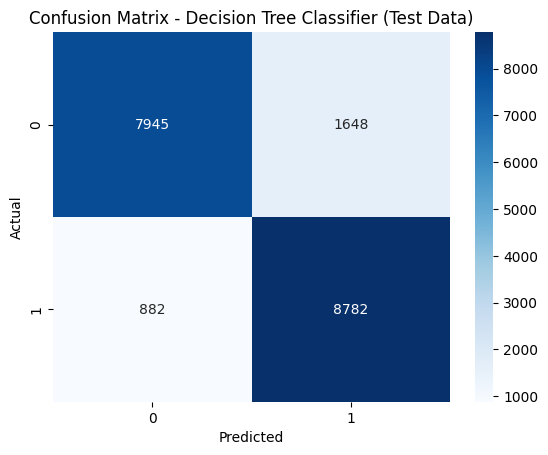

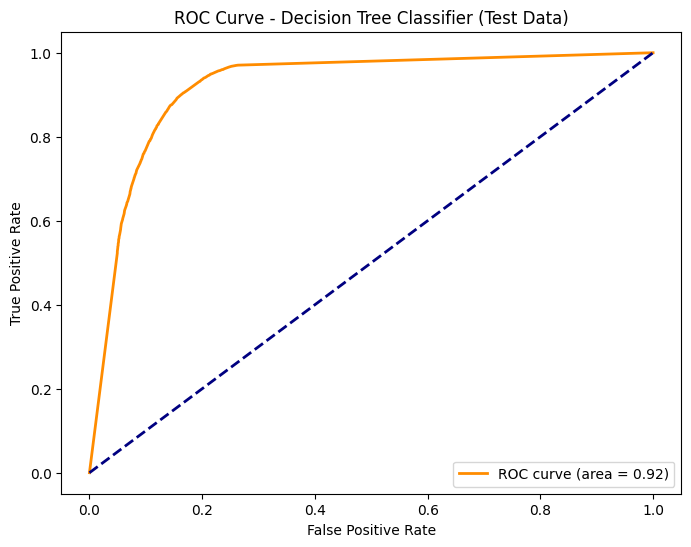

In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier2_os = DecisionTreeClassifier()
classifier2_os.fit(X_train_os, y_train_os)
evaluate_classifier(X_test_os, y_test_os, classifier2_os, "Decision Tree Classifier")
plot_roc_curve(classifier2_os, X_test_os, y_test_os, "Decision Tree Classifier")

Classifier: Random Forest Classifier
Accuracy: 0.87428

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      9593
         1.0       0.84      0.92      0.88      9664

    accuracy                           0.87     19257
   macro avg       0.88      0.87      0.87     19257
weighted avg       0.88      0.87      0.87     19257



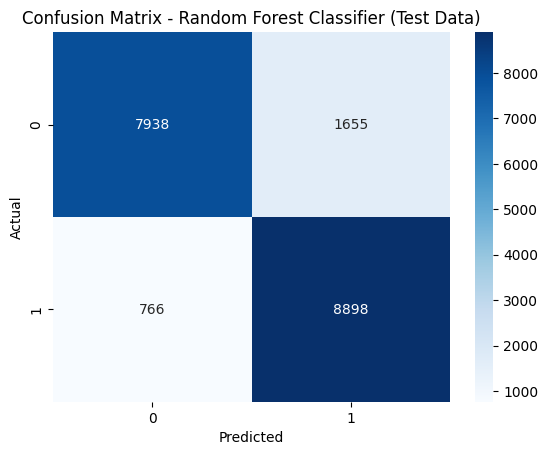

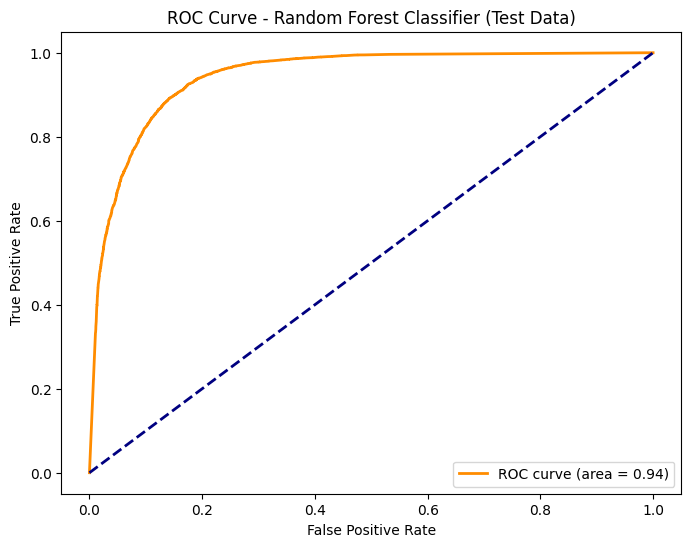

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier3_os = RandomForestClassifier()
classifier3_os.fit(X_train_os, y_train_os)
evaluate_classifier(X_test_os, y_test_os, classifier3_os, "Random Forest Classifier")
plot_roc_curve(classifier3_os, X_test_os, y_test_os, "Random Forest Classifier")

Classifier: K-nearest Neighbors Classifier
Accuracy: 0.83663

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      9593
         1.0       0.82      0.87      0.84      9664

    accuracy                           0.84     19257
   macro avg       0.84      0.84      0.84     19257
weighted avg       0.84      0.84      0.84     19257



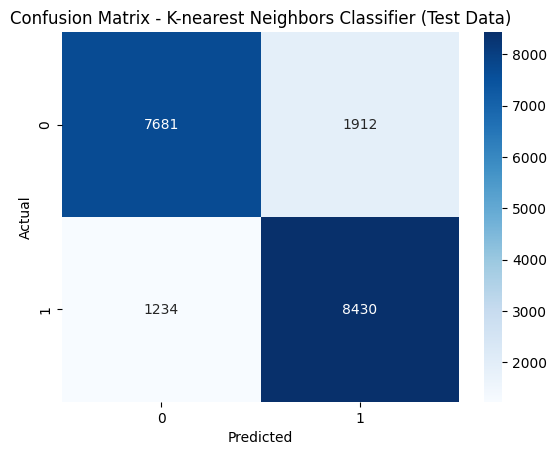

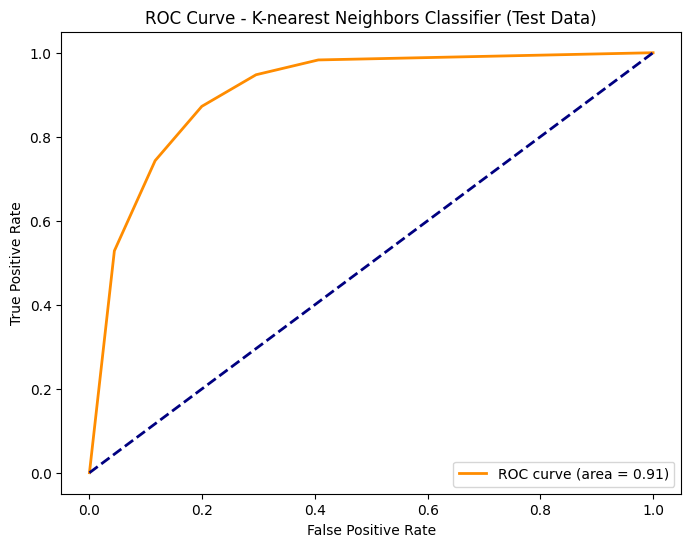

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier4_os = KNeighborsClassifier()
classifier4_os.fit(X_train_os, y_train_os)
evaluate_classifier(X_test_os, y_test_os, classifier4_os, "K-nearest Neighbors Classifier")
plot_roc_curve(classifier4_os, X_test_os, y_test_os, "K-nearest Neighbors Classifier")

## Model Comparision

In [46]:
# Print the evaluation metrices in table format
def evaluationTable(classifiers, X_test, y_test):
    # Create an empty DataFrame to store the evaluation metrics
    evaluation_table = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1_Score'])

    # Iterate over classifiers
    for classifier_name, classifier in classifiers.items():
        # Make predictions on the test data
        y_pred_test = classifier.predict(X_test)

        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)

        # Add performance metrics to the evaluation table
        evaluation_table.loc[classifier_name] = [accuracy, precision, recall, f1]

    return evaluation_table

In [47]:
classifiers_os = {
    "Logistic Regression": classifier1_os,
    "Decision Tree": classifier2_os,
    "Random Forest": classifier3_os,
    "K-nearest Neighbors": classifier4_os,
}

evaluation_table_os = evaluationTable(classifiers_os, X_test_os, y_test_os)
print("\nEvaluation Metrics Table for Oversampled Data:")
evaluation_table_os


Evaluation Metrics Table for Oversampled Data:


,Accuracy,Precision,Recall,F1_Score
Logistic Regression,0.712884,0.714182,0.713369,0.713775
Decision Tree,0.868619,0.841994,0.908733,0.874092
Random Forest,0.874279,0.843173,0.920737,0.880249
K-nearest Neighbors,0.836631,0.815123,0.872310,0.842747


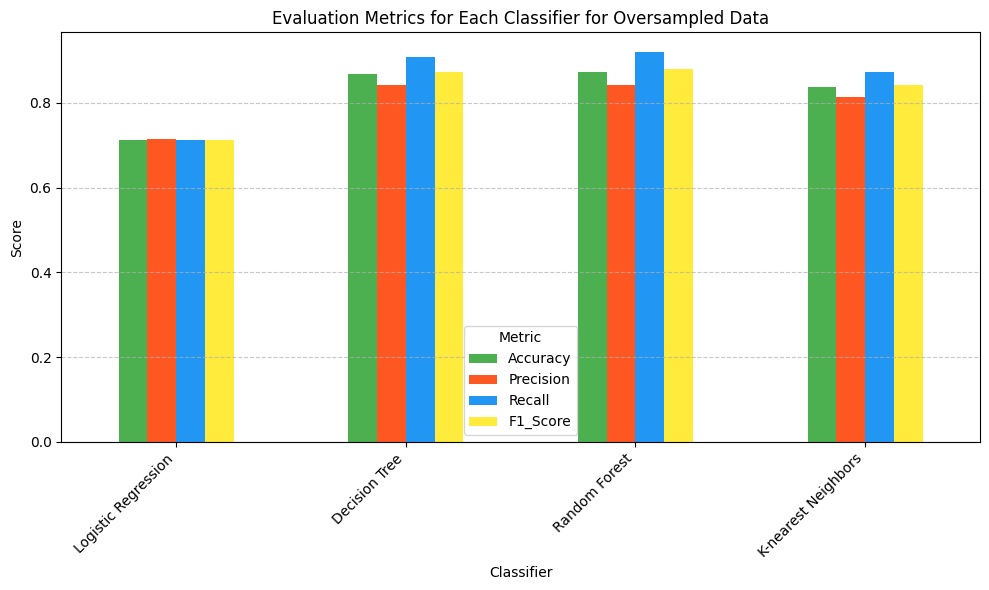

In [48]:
# Plot bar chart for evaluation metrices
colors = ['#4CAF50', '#FF5722', '#2196F3', '#FFEB3B']
evaluation_table_os.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Evaluation Metrics for Each Classifier for Oversampled Data')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Perform classification task on the undersampled data with 5 different classification model to compare the results:
- a) Logistic Regression
- b) Decision Tree
- c) Random Forest
- d) K-nearest Neighbors
- e) Gradient Boosting

In [49]:
# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the data
undersampled_df_scaled = scaler.fit_transform(undersampled_df)

# Convert the scaled array back to a DataFrame
undersampled_df_scaled = pd.DataFrame(undersampled_df_scaled, columns=undersampled_df.columns)

In [50]:
# Split the dataset into training and testing sets for model evaluation.
X_us = undersampled_df_scaled.drop('is_promoted', axis=1) 
y_us = undersampled_df_scaled['is_promoted'] 

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size=0.2, random_state=42)

Classifier: Logister Regression
Accuracy: 0.72532

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72       910
         1.0       0.72      0.74      0.73       903

    accuracy                           0.73      1813
   macro avg       0.73      0.73      0.73      1813
weighted avg       0.73      0.73      0.73      1813



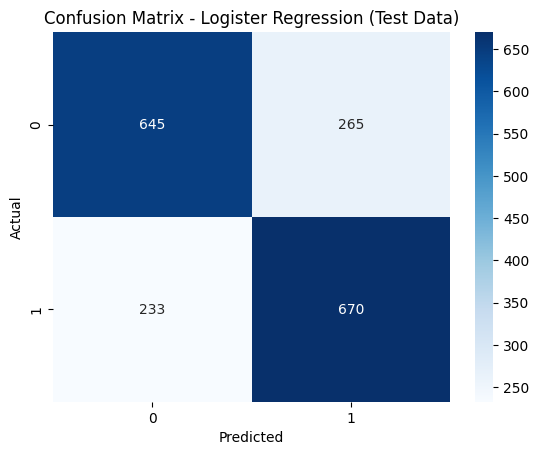

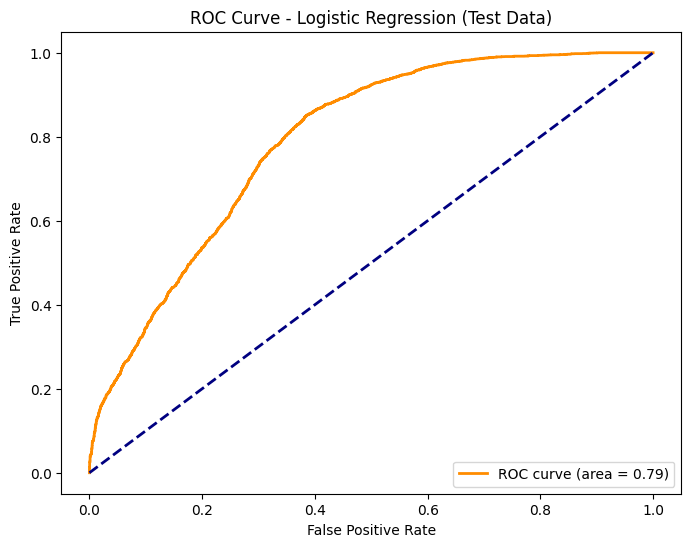

In [51]:
classifier1_us =  LogisticRegression()
classifier1_us.fit(X_train_us, y_train_us)
evaluate_classifier(X_test_us, y_test_us, classifier1_us, "Logister Regression")
plot_roc_curve(classifier1_us, X_train_us, y_train_us, "Logistic Regression")

Classifier: Decision Tree Classifier
Accuracy: 0.67181

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.68       910
         1.0       0.68      0.65      0.66       903

    accuracy                           0.67      1813
   macro avg       0.67      0.67      0.67      1813
weighted avg       0.67      0.67      0.67      1813



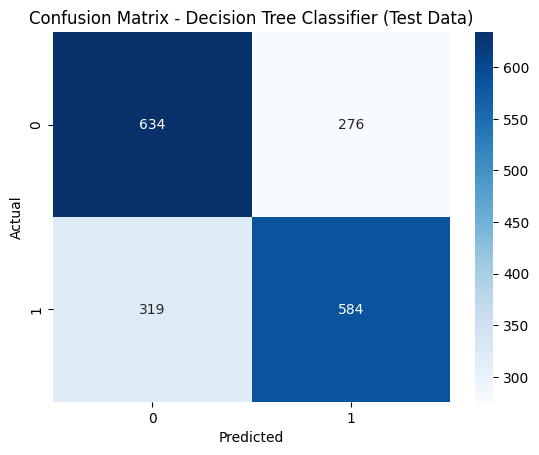

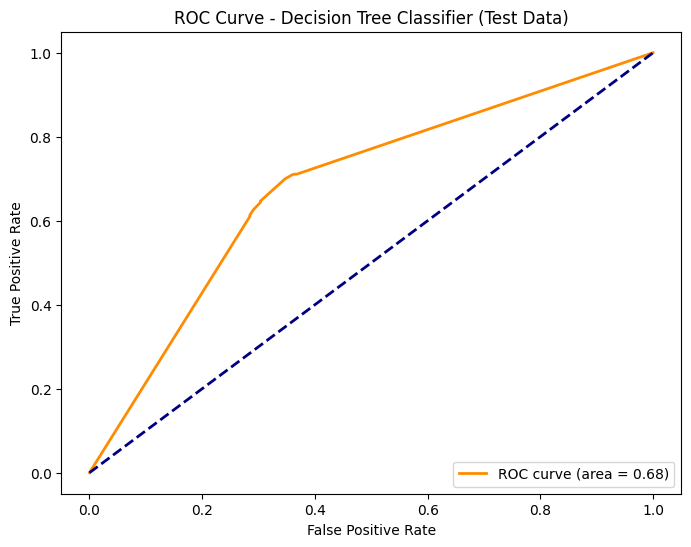

In [52]:
classifier2_us =  DecisionTreeClassifier()
classifier2_us.fit(X_train_us, y_train_us)
evaluate_classifier(X_test_us, y_test_us, classifier2_us, "Decision Tree Classifier")
plot_roc_curve(classifier2_us, X_test_us, y_test_us, "Decision Tree Classifier")


Classifier: Random Forest Classifier
Accuracy: 0.70436

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70       910
         1.0       0.69      0.73      0.71       903

    accuracy                           0.70      1813
   macro avg       0.70      0.70      0.70      1813
weighted avg       0.70      0.70      0.70      1813



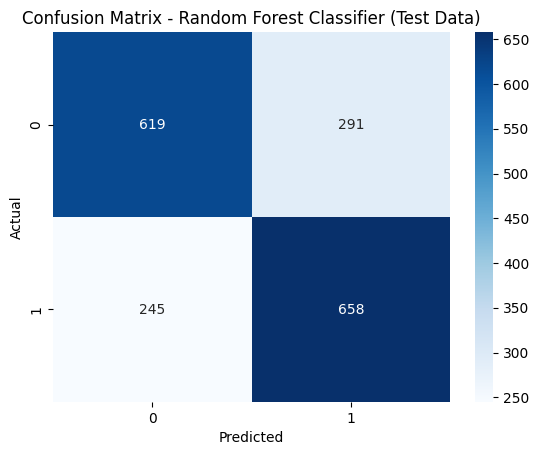

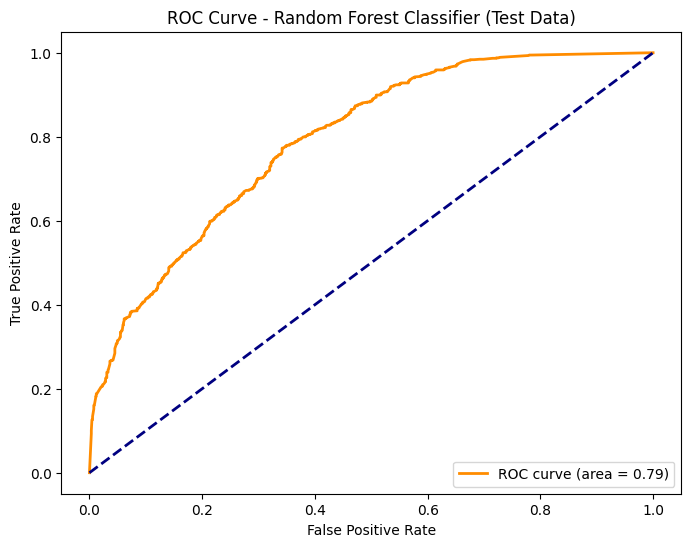

In [53]:
classifier3_us =  RandomForestClassifier()
classifier3_us.fit(X_train_us, y_train_us)
evaluate_classifier(X_test_us, y_test_us, classifier3_us,  "Random Forest Classifier")
plot_roc_curve(classifier3_us, X_test_us, y_test_us,  "Random Forest Classifier")


Classifier: K-nearest Neighbors Classifier
Accuracy: 0.72146

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.70      0.72       910
         1.0       0.71      0.74      0.73       903

    accuracy                           0.72      1813
   macro avg       0.72      0.72      0.72      1813
weighted avg       0.72      0.72      0.72      1813



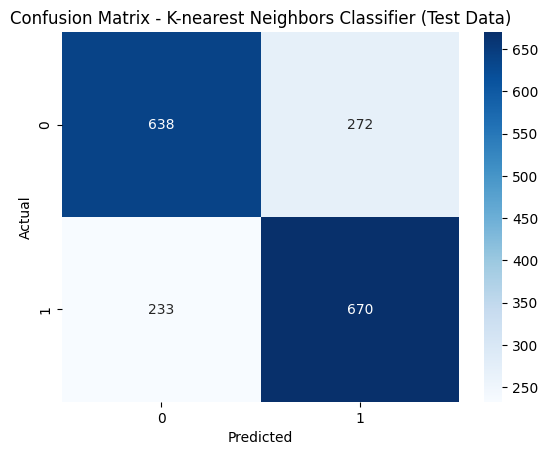

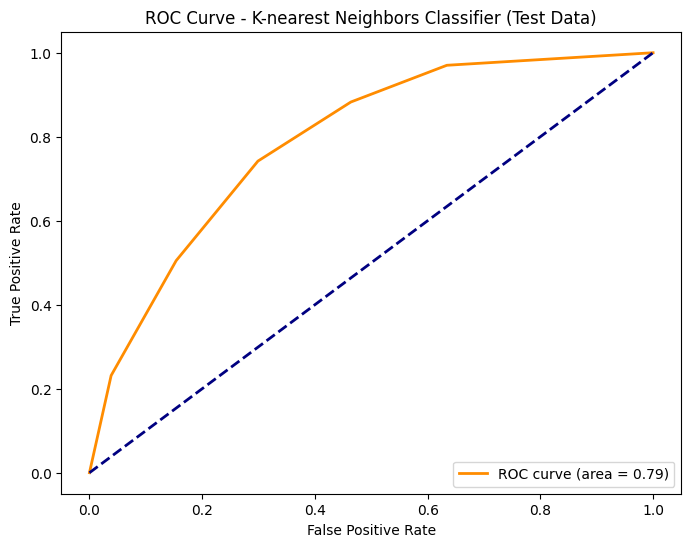

In [54]:
classifier4_us =  KNeighborsClassifier()
classifier4_us.fit(X_train_us, y_train_us)
evaluate_classifier(X_test_us, y_test_us, classifier4_us, "K-nearest Neighbors Classifier")
plot_roc_curve(classifier4_us, X_test_us, y_test_us, "K-nearest Neighbors Classifier")


## Model Comparision

In [55]:
classifiers_us = {
    "Logistic Regression": classifier1_us,
    "Decision Tree": classifier2_us,
    "Random Forest": classifier3_us,
    "K-nearest Neighbors": classifier4_us,
}

evaluation_table_us = evaluationTable(classifiers_us, X_test_us, y_test_us)
print("\nEvaluation Metrics Table for Undersampled Data:")
evaluation_table_us


Evaluation Metrics Table for Undersampled Data:


,Accuracy,Precision,Recall,F1_Score
Logistic Regression,0.725317,0.716578,0.741971,0.729053
Decision Tree,0.671815,0.679070,0.646733,0.662507
Random Forest,0.704357,0.693361,0.728682,0.710583
K-nearest Neighbors,0.721456,0.711253,0.741971,0.726287


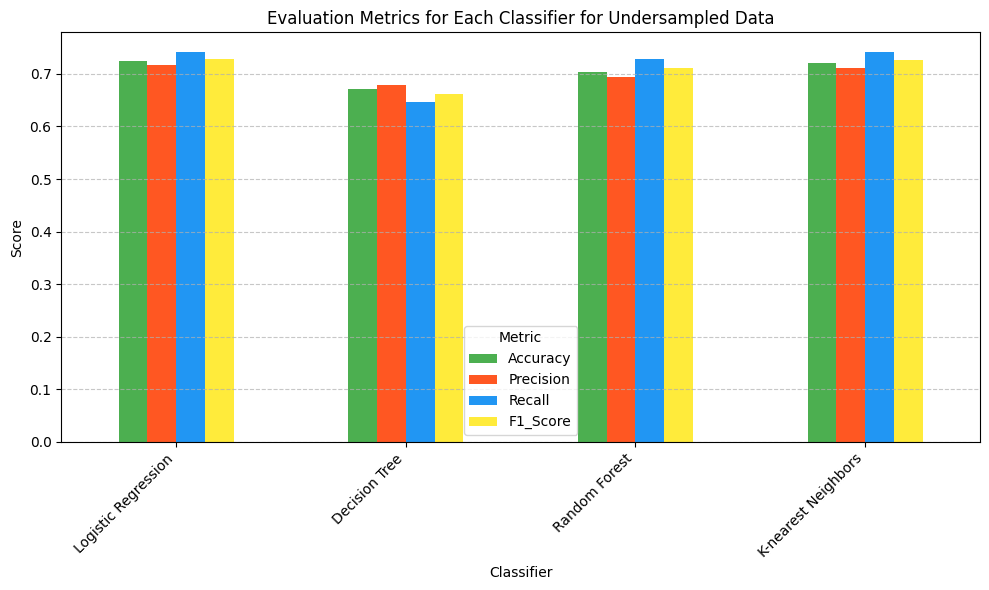

In [56]:
colors = ['#4CAF50', '#FF5722', '#2196F3', '#FFEB3B']
evaluation_table_us.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Evaluation Metrics for Each Classifier for Undersampled Data')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
# Combine evaluation tables for oversampled and undersampled data with classifiers side by side
evaluation_table_combined = pd.concat([evaluation_table_os, evaluation_table_us], axis=1, keys=['Oversampled', 'Undersampled'])

# Print the combined evaluation table
print("\nCombined Evaluation Metrics Table:")
evaluation_table_combined



Combined Evaluation Metrics Table:


Oversampled                               Undersampled  \
                       Accuracy Precision    Recall  F1_Score     Accuracy   
Logistic Regression    0.712884  0.714182  0.713369  0.713775     0.725317   
Decision Tree          0.868619  0.841994  0.908733  0.874092     0.671815   
Random Forest          0.874279  0.843173  0.920737  0.880249     0.704357   
K-nearest Neighbors    0.836631  0.815123  0.872310  0.842747     0.721456   

                                                   
                    Precision    Recall  F1_Score  
Logistic Regression  0.716578  0.741971  0.729053  
Decision Tree        0.679070  0.646733  0.662507  
Random Forest        0.693361  0.728682  0.710583  
K-nearest Neighbors  0.711253  0.741971  0.726287

The better performance of models trained on oversampled data compared to undersampled data can be attributed to the preservation of information and class balance in the training set. Oversampling helps prevent bias towards the majority class, improves generalization by retaining more minority class instances, reduces the risk of overfitting, and enhances model robustness to imbalanced data in real-world scenarios. In contrast, undersampling may discard valuable information from the majority class, potentially leading to overfitting and poorer generalization on unseen data, ultimately impacting the model's performance negatively.

After evaluation of 5 different classification models, Random Forest turns out to be the best model generalised on the oversampled data as it has the highest accuracy, precision, recall and f1 score.

## Hyperparameter-Tuning 

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
185 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only avail

Best Parameters: {'warm_start': False, 'oob_score': True, 'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_samples': 0.75, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini', 'class_weight': None, 'ccp_alpha': 0.0, 'bootstrap': True}
Classifier: Fine-Tuned Random Forest Classifier
Accuracy: 0.87407

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      9593
         1.0       0.84      0.92      0.88      9664

    accuracy                           0.87     19257
   macro avg       0.88      0.87      0.87     19257
weighted avg       0.88      0.87      0.87     19257



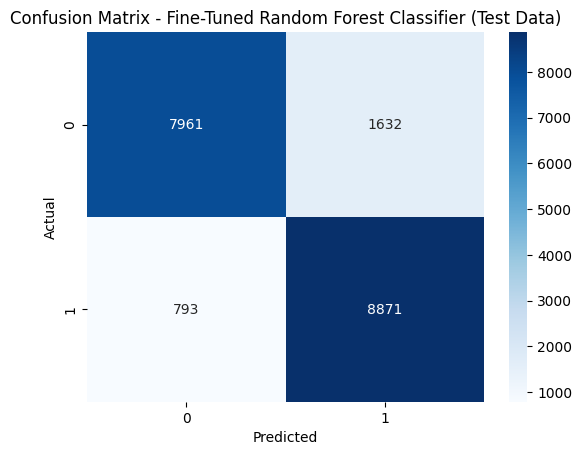

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'criterion': ['gini', 'entropy'],
    'max_samples': [None, 0.5, 0.75, 1.0],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'min_impurity_decrease': [0.0, 0.01, 0.02, 0.05],
    'oob_score': [True, False],
    'warm_start': [False, True],
    'ccp_alpha': [0.0, 0.01, 0.1, 0.001]
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Perform the randomized search
random_search.fit(X_train_os, y_train_os)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Initialize the Random Forest classifier with the best parameters
best_classifier = RandomForestClassifier(**best_params, random_state=42)

# Fit the classifier to the training data
best_classifier.fit(X_train_os, y_train_os)

# Evaluate the classifier
evaluate_classifier(X_test_os, y_test_os, best_classifier, "Fine-Tuned Random Forest Classifier")

In [63]:
classifiers_ft = {
    "Random Forest Classifier": classifier3_os,
    "Fine-Tuned Random Forest Classifier": best_classifier,
}

evaluation_table_ft = evaluationTable(classifiers_ft, X_test_os, y_test_os)
print("\nEvaluation Metrics Table for Oversampled Data:")
evaluation_table_ft


Evaluation Metrics Table for Oversampled Data:


,Accuracy,Precision,Recall,F1_Score
Random Forest Classifier,0.874279,0.843173,0.920737,0.880249
Fine-Tuned Random Forest Classifier,0.874072,0.844616,0.917943,0.879754


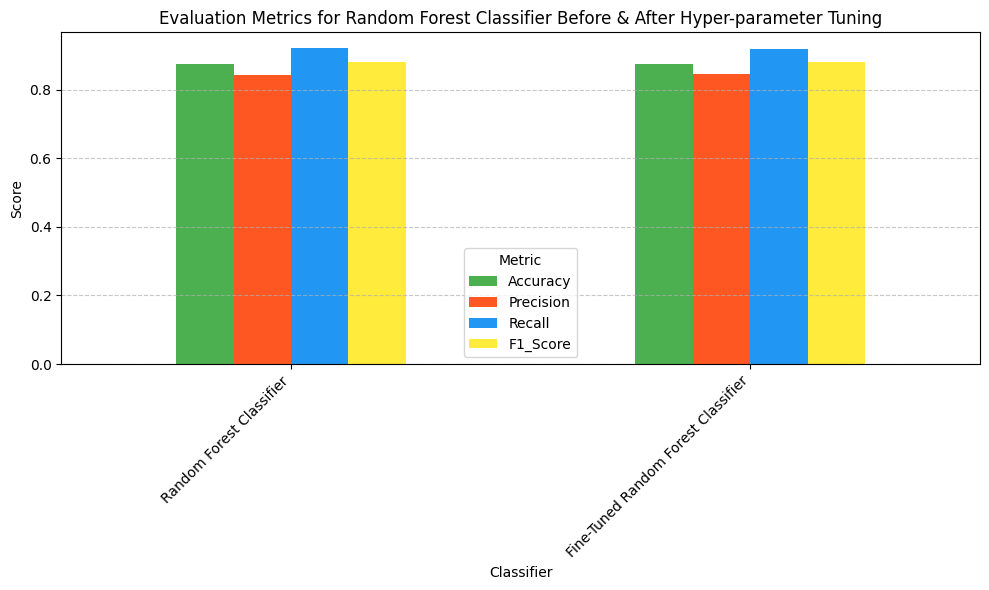

In [60]:
colors = ['#4CAF50', '#FF5722', '#2196F3', '#FFEB3B']
evaluation_table_ft.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Evaluation Metrics for Random Forest Classifier Before & After Hyper-parameter Tuning')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualise the feature importance to find the most important factor that contributes to position promotion for the company

Feature Importances:
                Feature  Importance
0    avg_training_score    0.404072
1  previous_year_rating    0.217466
2     length_of_service    0.143292
3         KPIs_met >80%    0.127052
4       no_of_trainings    0.029033
5     recruitment_other    0.019793
6  recruitment_sourcing    0.018514
7             education    0.017812
8           awards_won?    0.012425
9  recruitment_referred    0.010540


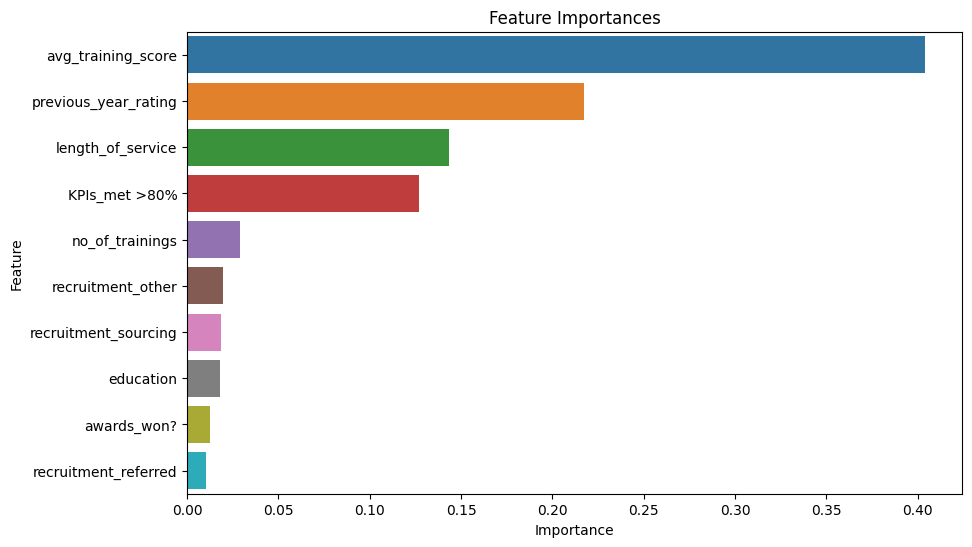

In [61]:
# Get feature importances from the tuned Random Forest model
importances = best_classifier.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': X_train_os.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print the feature importances
print("Feature Importances:")
print(feature_importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Based on the feature importance visualisation, avg_training_score turn out to be identified as the most important factor to be considered by the company for position promotion.